# Week 3


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from utils import classification
from machine_learning.course1.week3.labs.lab_utils_common import draw_vthresh, plot_data

plt.style.use("../../../../styles/deeplearning.mplstyle")

## Binary Classification


### Logistic Regression


> Notes
>
> - It also known as Sigmoid function.

Equations

$$
z = \vec{w}\vec{x} + b
$$

$$
g(z) = \frac{1}{1+e^{-z}}
$$

$$
f_{\vec{w},b}(\vec{X}) = \frac{1}{1+e^{-(\vec{w}\vec{x}+b)}}
$$

where,

- $0 < g(z) < 1$


In [6]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10, 11)

# Use the function implemented above to get the sigmoid values
y = classification.sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


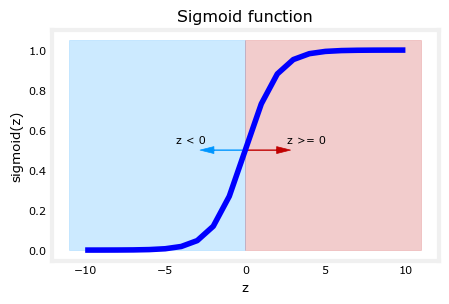

In [7]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
draw_vthresh(ax, 0)

#### Decision Boundaries


In [23]:
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

[0 1 2 3 4 5]
[ 3  2  1  0 -1 -2]


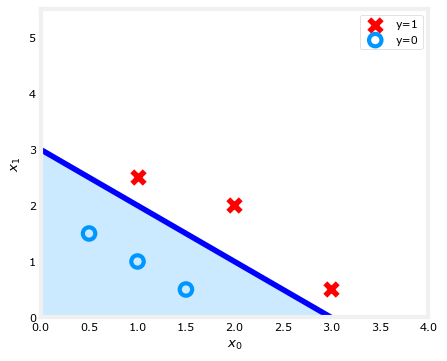

In [24]:
# Choose values between 0 and 6
x0 = np.arange(0, 6)
print(x0)
x1 = 3 - x0
print(x1)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
# Plot the decision boundary
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 5.5])

# Fill the region below the line
ax.fill_between(x0, x1, alpha=0.2)

# Plot the original data
plot_data(X, y, ax)
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")
plt.show()

### Cost Function


$$
J(\vec{w}, b) = \frac{1}{m}\sum \limits_{i=1}^{m} L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)})
$$

$$
L(f_{\vec{w}, b}(\vec{x}^{(i)}), y^{(i)}) =
\begin{cases}
    -\log\left(f_{\vec{w}, b}(\vec{x}^{(i)})\right) & \text{if } y^{(i)} = 1 \\
    -\log\left(1 - f_{\vec{w}, b}(\vec{x}^{(i)})\right) & \text{if } y^{(i)} = 0
\end{cases}
$$

where

- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

  $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

- where m is the number of training examples in the data set and:
  $$
  \begin{align}
    f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
    z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
    g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
  \end{align}
  $$


### Loss Function

$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$

This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:

$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

and when $ y^{(i)} = 1$, the right-hand term is eliminated:

$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$


### Over-fitting

Solutions:

1. Collect more data
2. Select most relevant features also called "Feature selection".
3. Reduce size of parameters also called "Regularization".


#### Regularization

$$
J(\vec{w}, b) = \frac{1}{2m}\sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum \limits_{j=1}^{n} w_j^2
$$

where,

- Mean squared error: $\frac{1}{2m}\sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})^2$
- Regularization Term: $\frac{\lambda}{2m} \sum \limits_{j=1}^{n} w_j^2$

Gradient Descent:

$$
w_j = w_j - \alpha \frac{\partial}{\partial{w_j}}J(\vec{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j
$$

$$
b = b - \alpha \frac{\partial}{\partial{b}}J(\vec{w},b) = \frac{1}{m}\sum\limits_{i=1}^{m}(f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})
$$
